<center> <u> <H2> Resume Screening </H2> </u> </center>

### 1.	Business Problem
+ A Manufracturing Company has approached your team to design and create an intelligent system which allows screening of resumes for a particular job posting. 

+ The system should be able to help the HR and other business departments to check and validate if any given resume is a match for that job posting.


Business Objectives:

+ Maximize resume matching accuracy
+ Minimize screening time
+ Increase hiring efficiency
+ Improve candidate satisfaction

Business Constraints:

+ Limited availability of quality resumes for certain job postings, which could impact the ability to train and test the ML model accurately.

+ Less feature availability may limit the system's capabilities and impact its accuracy and efficiency.

+ Need to ensure that the system is user-friendly and accessible for all HR and business departments who will be using it.

### Required Libraries

In [22]:
import pandas as pd
import warnings
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('punkt')
pd.set_option('display.max_columns', None) #to see all columns in a wide DataFrame
warnings.filterwarnings('ignore')
%matplotlib inline
os.getcwd() #get the path of current working directory

%run functions.ipynb

[nltk_data] Downloading package stopwords to /home/uday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/uday/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/uday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/uday/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Data Collection and Data Understanding

+ Data is extracted from 'https://www.livecareer.com/' in text format

In [2]:
dir_path = r"Datasets"
name = "resume"

resume_datasets(dir_path, name)


Concatenated 8 CSV files to resume.csv


#### Data Preparation

In [3]:
#getting the datat in csv format

data = pd.read_csv(r'resume.csv', encoding='utf-8')

data['Resume'] = data['Resume'].str.replace('\n', ' ')
data['Resume'] = data['Resume'].str.replace('\r', ',')

print(data.shape)
data.head()

(380, 2)


,Job_Category,Resume
0,business analyst,"Jessica, Claire, resumesample@example.com, (55..."
1,business analyst,"Jessica Claire, Montgomery Street, San Francis..."
2,business analyst,"Jessica Claire, 100 Montgomery St. 10th Floor ..."
3,business analyst,"Jessica Claire, Montgomery Street, San Francis..."
4,business analyst,"Jessica Claire, Montgomery Street, San Francis..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job_Category  380 non-null    object
 1   Resume        337 non-null    object
dtypes: object(2)
memory usage: 6.1+ KB


+ There are 2 feature in the dataset, it is textual value
+ There are Missing values

In [5]:
#Checking for missing valuse and duplicates

print('Missing Values:\n',data.isna().sum())

#droping the missing values
data.dropna(inplace=True)

print('-'*20)

#checking for duplicates
print('Total Number of Duplicates:',data.duplicated().sum())
data.drop_duplicates(inplace=True)

Missing Values:
 Job_Category     0
Resume          43
dtype: int64
--------------------
Total Number of Duplicates: 0


#### Named Entity Recognition (NER)
+ NER is a natural language processing technique that is used to identify and extract named entitie.
+ In the context of resume screening, NER can be used to extract important information such as the candidate's name, contact details, educational qualifications and skills from their resume.
+ PyResParser is a popular open-source library in Python for parsing and extracting data from resumes, and it includes a variety of features including NER

In [6]:
#getting the data with extrated features

data[['name', 'email', 'skills']] = data['Resume'].apply(lambda x: pd.Series(extract_info(x)))
data.head()

,Job_Category,Resume,name,email,skills
0,business analyst,"Jessica, Claire, resumesample@example.com, (55...","Jessica,","resumesample@example.com,","[Mock, Compliance, Unix, Kpis, Electronics, Te..."
1,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,","[Cpr, Public health, Database, Microsoft offic..."
2,business analyst,"Jessica Claire, 100 Montgomery St. 10th Floor ...",Jessica Claire,"resumesample@example.com,","[Analytics, Database, Windows, Usability, Phar..."
3,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,","[Database, Microsoft excel, Retention, Standar..."
4,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,","[Email, Analytics, Billing, Green, Financial s..."


In [7]:
#checking for missing values

print(f'Total Missing Values:\n',data.isna().sum())
data.fillna('unknown', inplace=True)

Total Missing Values:
 Job_Category    0
Resume          0
name            0
email           0
skills          0
dtype: int64


#### Data Dictionary 

|  Name of Feature | Description  | Type  | Relevance  |
|------------------|--------------|-------|--------------------------|
| Job Category | The type of job category for which the resume is being screened | Nominal | Relevent, It is the output column |
| Resume | The actual text or document of the candidate's resume | Unstructured, Textual Data | Relevent, It gives useful information |
| Name | The candidate's name as mentioned in the resume | Nominal | Low Relevent, not useful for model building |
| Email  | The candidate's email address as mentioned in the resume | Nominal | Low Relevent, not useful for model building |
| Skills  | The candidate's skills as mentioned in the resume | Nominal | Relevent, It gives useful information |



#### Data Cleaning

In [8]:
#Cleaning the text on resume column
data['cleaned_resume'] = data['Resume'].apply(clean_resume)

#Cleaning skills
data['skills'] = data['skills'].apply(clean_text)

data.head()

,Job_Category,Resume,name,email,skills,cleaned_resume
0,business analyst,"Jessica, Claire, resumesample@example.com, (55...","Jessica,","resumesample@example.com,",mock compliance unix kpis electronics technica...,jessica claire resumesample example com 555 43...
1,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",cpr publichealth database microsoftofficesuite...,jessica claire montgomery street san francisco...
2,business analyst,"Jessica Claire, 100 Montgomery St. 10th Floor ...",Jessica Claire,"resumesample@example.com,",analytics database windows usability pharmacy ...,jessica claire 100 montgomery st 10th floor 55...
3,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",database microsoftexcel retention standardizat...,jessica claire montgomery street san francisco...
4,business analyst,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",email analytics billing green financialstateme...,jessica claire montgomery street san francisco...


### 4. Exploratory Data Analysis (EDA

In [31]:
# number of resumes received for each job category
data['Job_Category'].value_counts()

project manager            49
web designer               47
data scientist             46
business analyst           45
cloud security engineer    45
java developer             42
network administrator      40
human resources manager    23
Name: Job_Category, dtype: int64

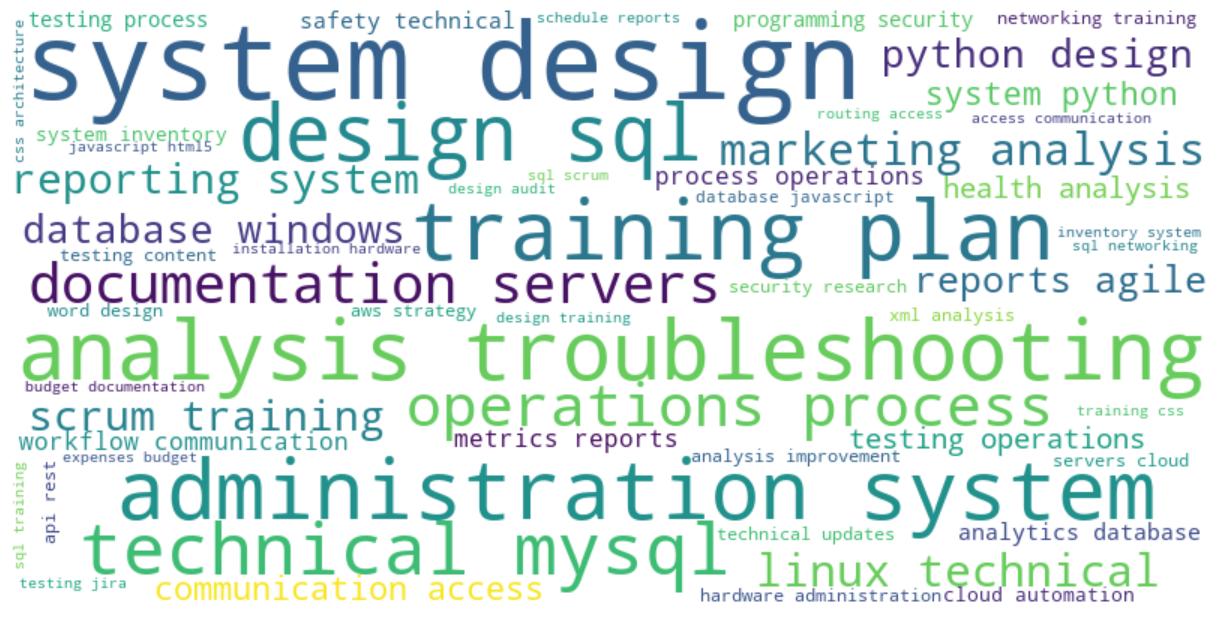

In [10]:
# generating wordcloud on resume skills
# genarting wordcloud with ngrams

all_skills = ' '.join(data['skills'].values)

generate_wordcloud(all_skills, 2)  


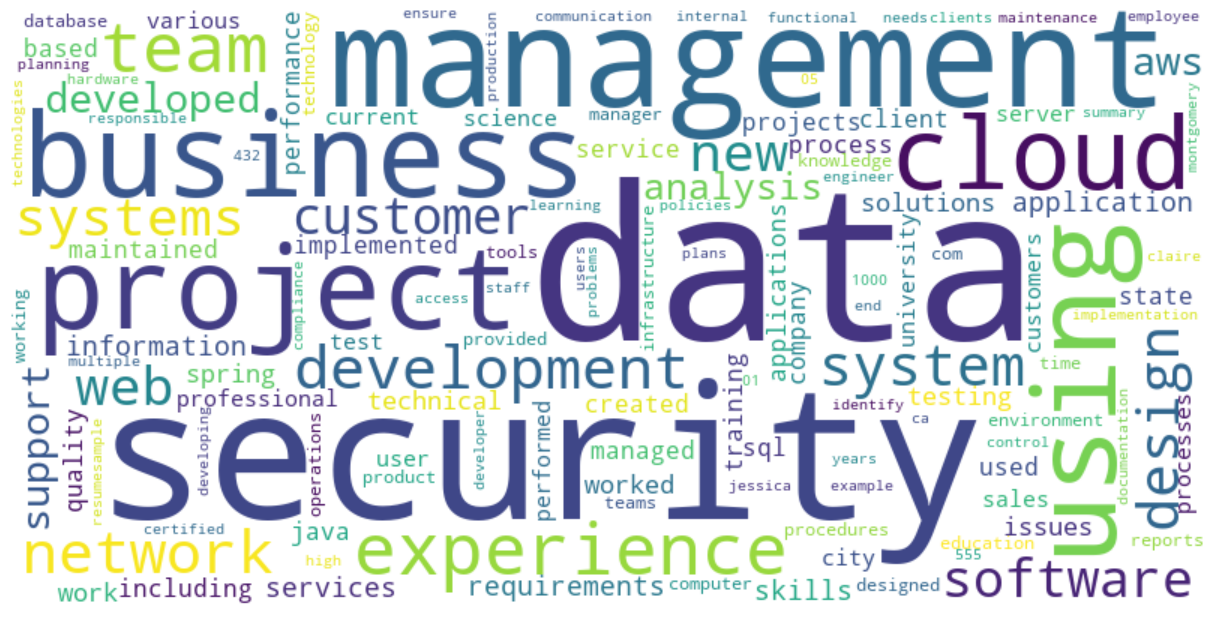

In [11]:
# word cloud to visualize the most frequently used words in the resumes
# genarting wordcloud with bigrams

all_resumes = ' '.join(data['cleaned_resume'].values)

# generateing bigrams

generate_wordcloud(all_resumes, 1)  

### 5.	Model Building

In [68]:
#splitting the data for train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data['cleaned_resume']
y = data['Job_Category']

# Label Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)


In [69]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.preprocessing import DenseTransformer
import itertools

dict5 = {'Model Name':[], 'Test Accuracy':[], 'Train Accuracy': []}

def classify(model, name, x_train, x_test, y_train, y_test, dict = dict):
    # Model training
    pipeline_model = Pipeline([
        ('count', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('to_dense', DenseTransformer()),
        ('clf', model)
    ])

    pipeline_model.fit(x_train, y_train)

    # Prediction on test dataset
    print("# Prediction on test dataset:")
    test = pipeline_model.predict(x_test)
    test_accuracy = accuracy_score(test, y_test) * 100
    print('Accuracy:', test_accuracy)

    # Prediction on train dataset
    print("# Prediction on train dataset:")
    train = pipeline_model.predict(x_train)
    train_accuracy = accuracy_score(train, y_train) * 100
    print('Accuracy:', train_accuracy)
    
    #Appending Model Results to dict
    dict5['Model Name'].append(name)
    dict5['Test Accuracy'].append(test_accuracy)
    dict5['Train Accuracy'].append(train_accuracy)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, test)

    classes = np.unique(y_train)
    fig = plt.figure(figsize=(14, 6)) 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    #diplaying the best model
    print('Best Model:')
    result = pd.DataFrame(dict5)
    display(result.sort_values('Test Accuracy', ascending=False))

    # Return the trained model
    return pipeline_model


# Prediction on test dataset:
Accuracy: 95.58823529411765
# Prediction on train dataset:
Accuracy: 98.51301115241635


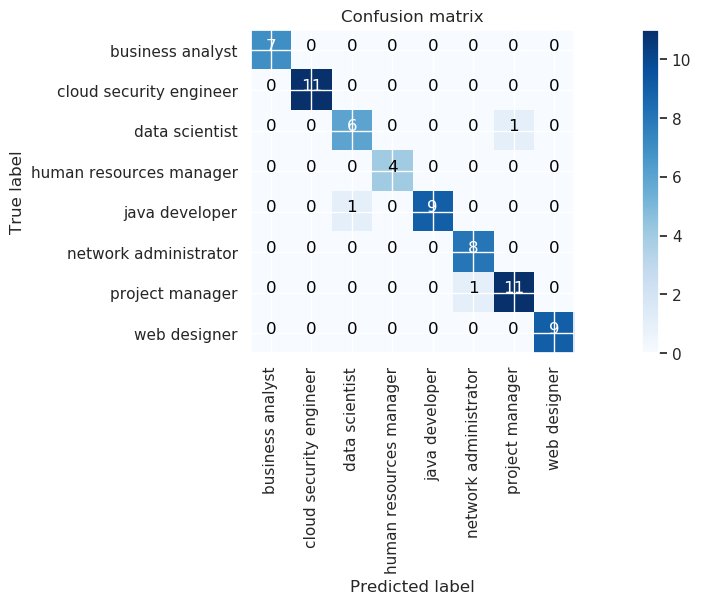

Best Model:


,Model Name,Test Accuracy,Train Accuracy
0,Support Vector Machine,95.588235,98.513011


In [70]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

model = OneVsRestClassifier(SVC(kernel='sigmoid',gamma = 2.5))

name = 'Support Vector Machine'

# trained model
trained_model = classify(model, name, x_train, x_test, y_train, y_test)


# Prediction on test dataset:
Accuracy: 94.11764705882352
# Prediction on train dataset:
Accuracy: 92.93680297397769


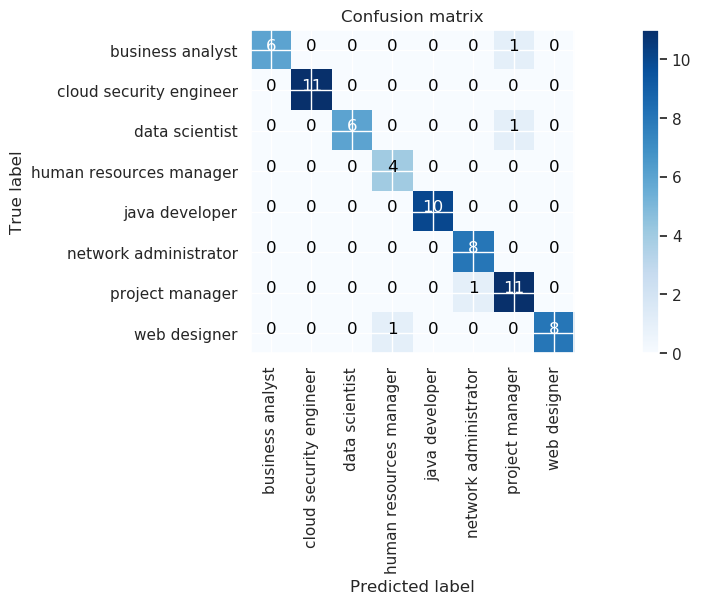

Best Model:


,Model Name,Test Accuracy,Train Accuracy
0,Support Vector Machine,95.588235,98.513011
1,K-Nearest Neighbor(KNN),94.117647,92.936803


In [71]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

model = OneVsRestClassifier(KNN(n_neighbors=5))

name = 'K-Nearest Neighbor(KNN)'

#trained model
trained_model = classify(model, name, x_train, x_test, y_train, y_test)

# Prediction on test dataset:
Accuracy: 94.11764705882352
# Prediction on train dataset:
Accuracy: 99.25650557620817


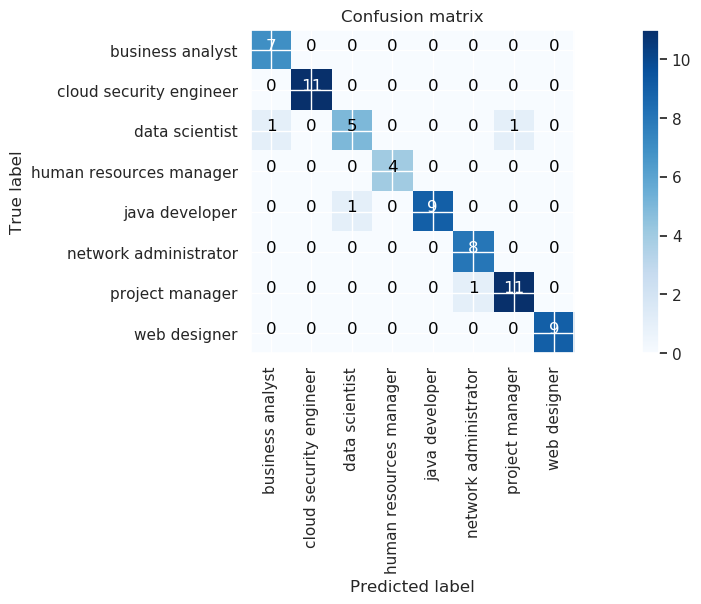

Best Model:


,Model Name,Test Accuracy,Train Accuracy
0,Support Vector Machine,95.588235,98.513011
1,K-Nearest Neighbor(KNN),94.117647,92.936803
2,LogisticRegression,94.117647,99.256506


In [72]:
from sklearn.linear_model import LogisticRegression as LR 

model = OneVsRestClassifier(LR(C=2.5))

name = 'LogisticRegression'

# Ttrained model
trained_model = classify(model, name, x_train, x_test, y_train, y_test)


# Prediction on test dataset:
Accuracy: 95.58823529411765
# Prediction on train dataset:
Accuracy: 98.51301115241635


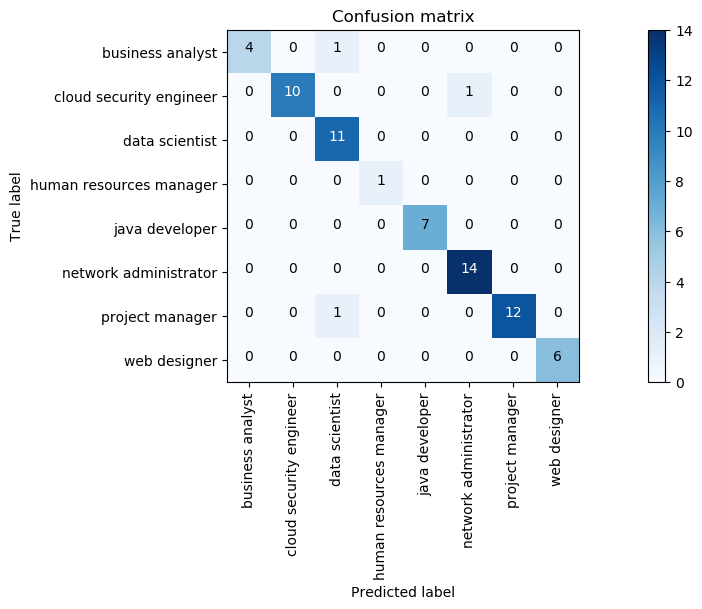

In [17]:
#best model

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


# Create a new SVC object with a different value for C
model = OneVsRestClassifier(SVC(kernel='sigmoid',gamma = 2.5))

# Train and test the updated model
trained_model = classify(model, x_train, x_test, y_train, y_test)

### Deployment:

In [18]:
#Saving the trained model for deployment
import pickle

filename = 'SVM_model.sav'

pickle.dump(trained_model, open(filename, 'wb'))

In [19]:
load_model = pickle.load(open(filename, 'rb'))

In [20]:
# prediction on the whole dataset using the trained pipeline model
predictions = load_model.predict(data['cleaned_resume'])

pred_data = pd.DataFrame()
pred_data[['Resume', 'Name', 'Email', 'Skills']] = data[['Resume', 'name', 'email', 'skills']]
pred_data['Job_Category'] = predictions

pred_data.head(10)

,Resume,Name,Email,Skills,Job_Category
0,"Jessica, Claire, resumesample@example.com, (55...","Jessica,","resumesample@example.com,",mock compliance unix kpis electronics technica...,business analyst
1,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",cpr publichealth database microsoftofficesuite...,business analyst
2,"Jessica Claire, 100 Montgomery St. 10th Floor ...",Jessica Claire,"resumesample@example.com,",analytics database windows usability pharmacy ...,business analyst
3,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",database microsoftexcel retention standardizat...,business analyst
4,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",email analytics billing green financialstateme...,business analyst
5,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",instrumentation analytics modeling linux econo...,data scientist
6,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",analytics microsoftofficesuite technical trans...,business analyst
7,"Jessica Claire, 100 Montgomery St. 10th Floor ...",Jessica Claire,"resumesample@example.com,",supervisor compliance billing merchandising te...,business analyst
8,"Jessica Claire, Montgomery Street, San Francis...",Jessica Claire,"resumesample@example.com,",english outreach businessdevelopment technical...,business analyst
9,"Jessica Claire, 100 Montgomery St. 10th Floor ...",Jessica Claire,"resumesample@example.com,",compliance usability windows billing externalp...,business analyst


In [21]:
#saving the predicted data

pred_data.to_csv('pred_data.csv')